In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [31]:
churn_data = pd.read_csv('churn.csv')

# Задание 9.1

([<matplotlib.patches.Wedge at 0x1fb72160a20>,
 [Text(-0.8823431426537007, 0.6568642010431011, '0'),
  Text(0.8823431426537006, -0.6568642010431012, '1')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

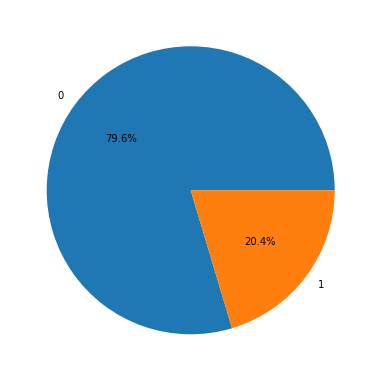

In [3]:
exited_counts = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_counts,
    labels = exited_counts.index,
    autopct = '%.1f%%'
)

### На представленном выше графике можно заметить, что соотношение ушедших (1) -лояльных (0) клиентов составляет примерно 1:4, т.е  лояльных клиентов примерно в четыре раза больше, чем ушедших

# Задание 9.2

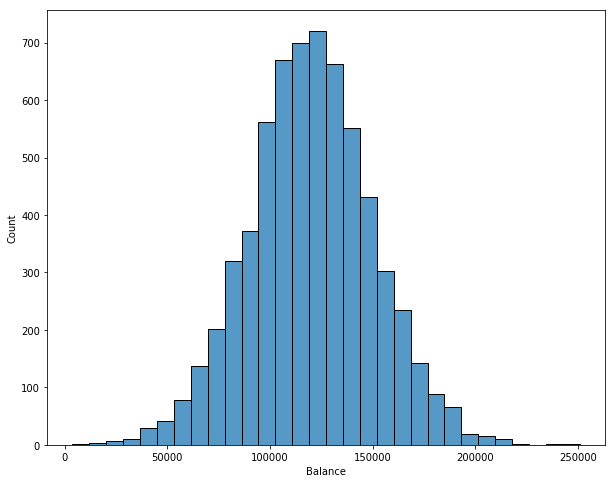

In [4]:
hist_data = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(10, 8))
sns.histplot(
    data=hist_data,
    x='Balance',
    bins=30
);

### Распределение баланса очень близко к нормальному распределению. Модально значение находится около значения баланса 12500  (примерно 700 клиентов). Выделяется небольшой "пенек" около значения баланса чуть меньше 250000. Получается, что большинство клиентов имеет баланс в диапазоне от 9000 до 16000.

# Задание 9.3

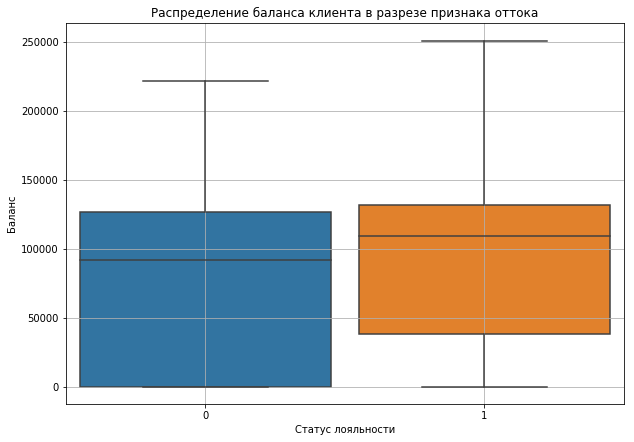

In [50]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Balance',
    x='Exited',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Статус лояльности');
boxplot.set_ylabel('Баланс');
boxplot.grid()

### На графике можно увидеть, что медианное значение баланска ушедших клиентов (статус лояльности = 1) немного выше медианного значения лояльных  клиентов (статус лояльности = 0). Также можно обратить внимание, что ушедшие клиенты имеют наибольший разброс в балансе. Возможно, ушедших клиентов не устраивало качество предоставленных услуг банка, которые приобрел клиент, непривлекательные условия в банке (так например низкие процентные ставки). 

# Задание 9.4

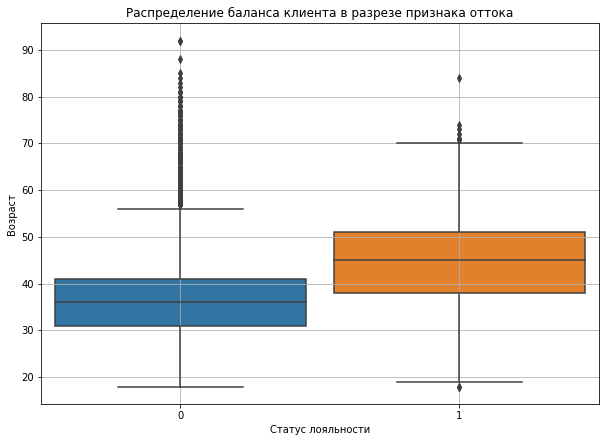

In [52]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Age',
    x='Exited',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Статус лояльности');
boxplot.set_ylabel('Возраст');
boxplot.grid()

### Наибольшее количество потенциальных выбросов наблюдается в группе лояльных клиентов. Банку следует обратить на внимание на возрастную группу от примерно 38 до примерно 52 лет, так как в этой группе преимущественно наблюдается отток клиентов.

# Задание 9.5

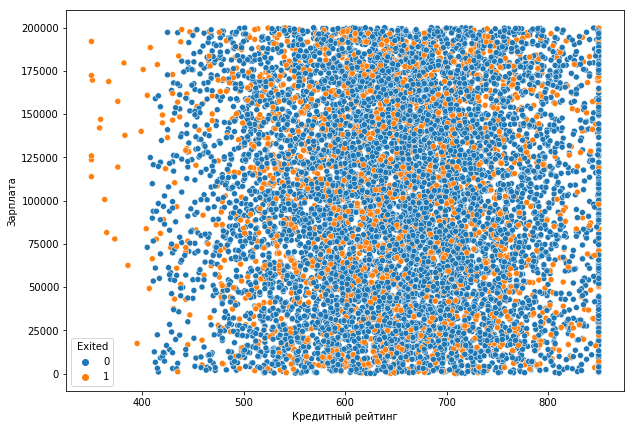

In [32]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=churn_data, 
    x="CreditScore",
    y="EstimatedSalary", 
    hue="Exited"
)
scatterplot.set_xlabel('Кредитный рейтинг');
scatterplot.set_ylabel('Зарплата');

### На графике не наблюдается четкой зависимости кредитного рейтинга от зарплаты среди ушедших и лояльных клиентов. 

# Задание 9.6

Text(0, 0.5, 'Доля ушедших клиентов')

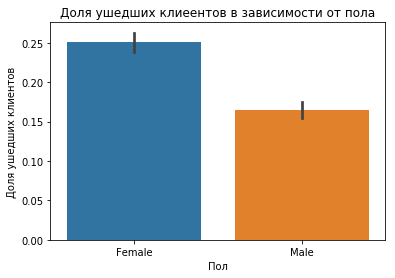

In [8]:
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited'
)

barplot.set_title("Доля ушедших клиеентов в зависимости от пола")
barplot.set_xlabel("Пол")
barplot.set_ylabel("Доля ушедших клиентов")

### Отчетливо видно, что чаще уходят женщины.

# Задание 9.7

Text(0.5, 0, 'Статус лояльности')

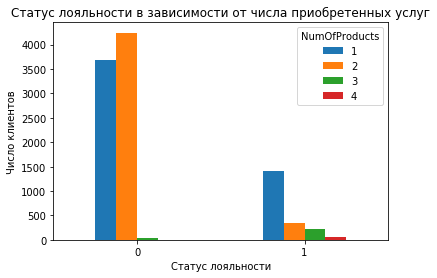

In [48]:
status_product_counts = churn_data.pivot_table(
    values='CustomerId',
    index='Exited',
    columns='NumOfProducts',
    aggfunc='count',
)
status_product_counts.plot(kind='bar')
plt.title('Статус лояльности в зависимости от числа приобретенных услуг')
plt.xticks(rotation=0)
plt.ylabel('Число клиентов')
plt.xlabel('Статус лояльности')

### На графике можно увидеть, что клиенты, которые ушли, в основном приобретали 1 услугу банка, но по сравнению с лояльными клиентами, было намного больше клиентов, которые приобретали 3 и 4 услуги. Среди лояльных клиентов никто не приобретал 4 услуги, и совсем немного, кто приобретал 3 улуги. 

# Задание 9.8

Text(0.5, 0, 'Статус лояльности')

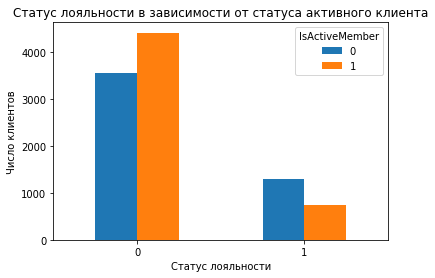

In [49]:
status_active_counts = churn_data.pivot_table(
    values='CustomerId',
    index='Exited',
    columns='IsActiveMember',
    aggfunc='count',
)
status_active_counts.plot(kind='bar')
plt.title('Статус лояльности в зависимости от статуса активного клиента')
plt.xticks(rotation=0)
plt.ylabel('Число клиентов')
plt.xlabel('Статус лояльности')

### Среди ушедших клиентов преимущество были клиенты со статусом неактивного клиента, в то время, как для лояльных клиентов это отношение обратно. Возможно, банку следует ввести какие-нибудь специальные акции, услуги по сниженной цене для статуса активного клиента.

# Задание 9.9

In [17]:
choropleth_data = churn_data.groupby('Geography',as_index = False)[['Exited']].mean()

fig = px.choropleth(
    data_frame=choropleth_data , 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited",
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)

#отображаем график
fig.show()

### Наибольший отток клиентов наблюдается в Германии. Германия является одной из европейских стран с высоким уровнем дохода, и возможно, у ушедших клиентов была возможность быстрее расплатиться с услугами банка (например, погашение кредита), и больше не пользоваться услугами банка, так как в основном после 40 лет уже нет причин брать кредиты, так как большие покупки (недвижимость, автомобиль), в основном приобретаются до 40 лет 

# Задание 9.10

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

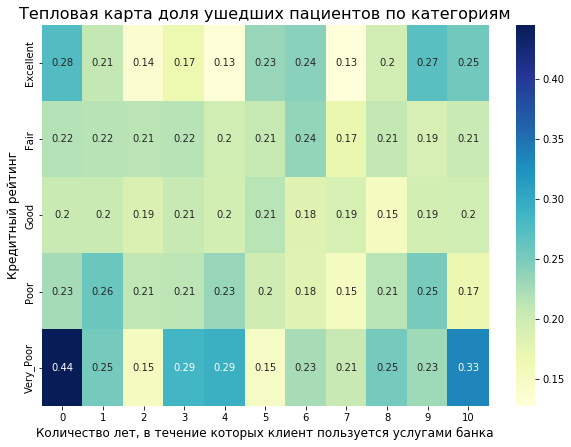

In [30]:
churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(get_credit_score_cat)

pivot_churn = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat'
)

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(data=pivot_churn, annot = True, cmap='YlGnBu')
heatmap.set_title('Тепловая карта доля ушедших пациентов по категориям', fontsize=16);
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка', fontsize=12);
heatmap.set_ylabel('Кредитный рейтинг', fontsize=12);

### Согласно графику, сразу (Tenure = 0 лет) уходят клиенты с низким кредитным рейтингом (Very poor), клиенты с кредитным рейтингом Very poor, которые пользовались услугами банка 3,4,10 лет. И  также сразу  (Tenure = 0 лет) уходят клиенты с высоким кредитным рейтингом (Excellent) 